In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import numpy as np
import networkx as nx
import  itertools as it
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hc

In [14]:
#data = arff.loadarff("datasets/treated.csv")

#df = pd.DataFrame(data[0])
from scipy.spatial.distance import pdist
df = pd.read_csv("datasets/treated.csv", na_values=["?"])
df.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
df.replace('?', np.NaN)
#df['rbc'].replace(df['rbc'].head()[0], inplace=True)


df.isnull().values.any()
df.isnull().sum()
col = df.columns.tolist()


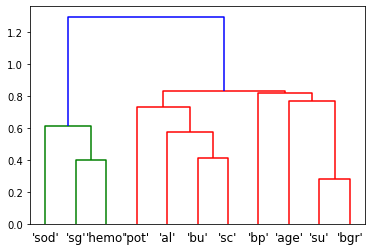

In [18]:
corr = 1 - df.corr() 

corr_condensed = hc.distance.squareform(corr) # convert to condensed
z = hc.linkage(corr_condensed, method='average')
hc.dendrogram(z, labels=corr.columns)
plt.show()

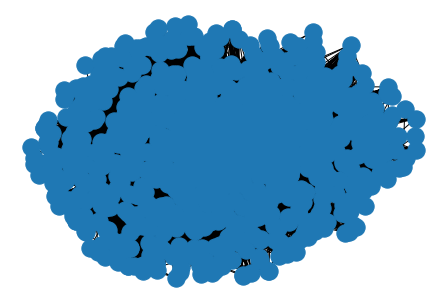

<Figure size 21600x21600 with 0 Axes>

In [30]:
graph = nx.Graph()

for index, row in df.iterrows():
    for i in it.combinations(col,2):
        
        node_a = i[0]+ str(row[i[0]])
        node_b = i[1]+ str(row[i[1]])
        
        graph.add_edge(node_a,node_b)

nx.draw(graph, layout=nx.spring_layout(graph,  k=0.3*1/np.sqrt(len(graph.nodes())), iterations=20), scale=25)
plt.figure(3, figsize=(300, 300))

plt.show()